In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [77]:
data = pd.read_csv('./data/final_data_after_winsorization.csv', index_col='행정동명')
data.fillna(0, inplace=True)
data.head(2)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,총_20_30대_(수),총_40_50대_(수),총_60대이상_(수),총_10대,총_20_30대,총_40_50대,총_60대이상,유치원_초등학교_(수),유치원_초등학교,거주_유동_인구당_매출액
행정동명,,,,,,,,,,,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,449,118,10.0,0.0,1.0,...,15010,17080,11642,0.095664,0.272572,0.310162,0.211411,3.0,0.000054,26.850496
가락2동,12375,3568,2746,2825,2641,453,142,3.0,0.0,4.0,...,17364,20426,14158,0.104766,0.277141,0.326013,0.225971,6.0,0.000096,35.834189


In [4]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']
data = data[features]
print(f'사용하는 컬럼수: {len(features)}개')

사용하는 컬럼수: 14개


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))
scaled_df.index = data.index
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
행정동명,,,,,,,,,,,,,,
가락1동,0.014204,0.076923,0.0,0.025989,0.116279,0.0,0.085682,0.105911,0.125300,0.639775,0.426207,0.408414,0.457904,0.112284
가락2동,0.014204,0.346154,0.0,0.035016,0.034884,0.0,0.088504,0.182266,0.220257,0.745585,0.466991,0.415310,0.489702,0.269226


In [6]:
from sklearn.decomposition import TruncatedSVD, PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_result = pd.DataFrame((pca.transform(scaled_df)))

num_of_principal = pca_result.shape[1] 
print('주성분의 개수:', num_of_principal)
pca_result.index = data.index  
pca_result.head()

주성분의 개수: 3


,0,1,2
행정동명,,,
가락1동,0.313751,-0.194982,-0.059432
가락2동,0.416137,-0.051024,0.035967
가락본동,0.156997,0.112429,0.042758
가리봉동,-0.612605,0.107408,-0.156476
가산동,-0.117360,0.795470,0.181084


In [7]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

주성분의 설명력
제 1주성분 : 0.3031472103177469
제 2주성분 : 0.24872724867827828
제 3주성분 : 0.11136909342828541


In [8]:
pca_result_T = pca_result.reset_index().copy()
pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]
pca_result_T.columns

Index(['V_행정동명', 'V_0', 'V_1', 'V_2'], dtype='object')

<Axes: xlabel='V_0', ylabel='V_1'>

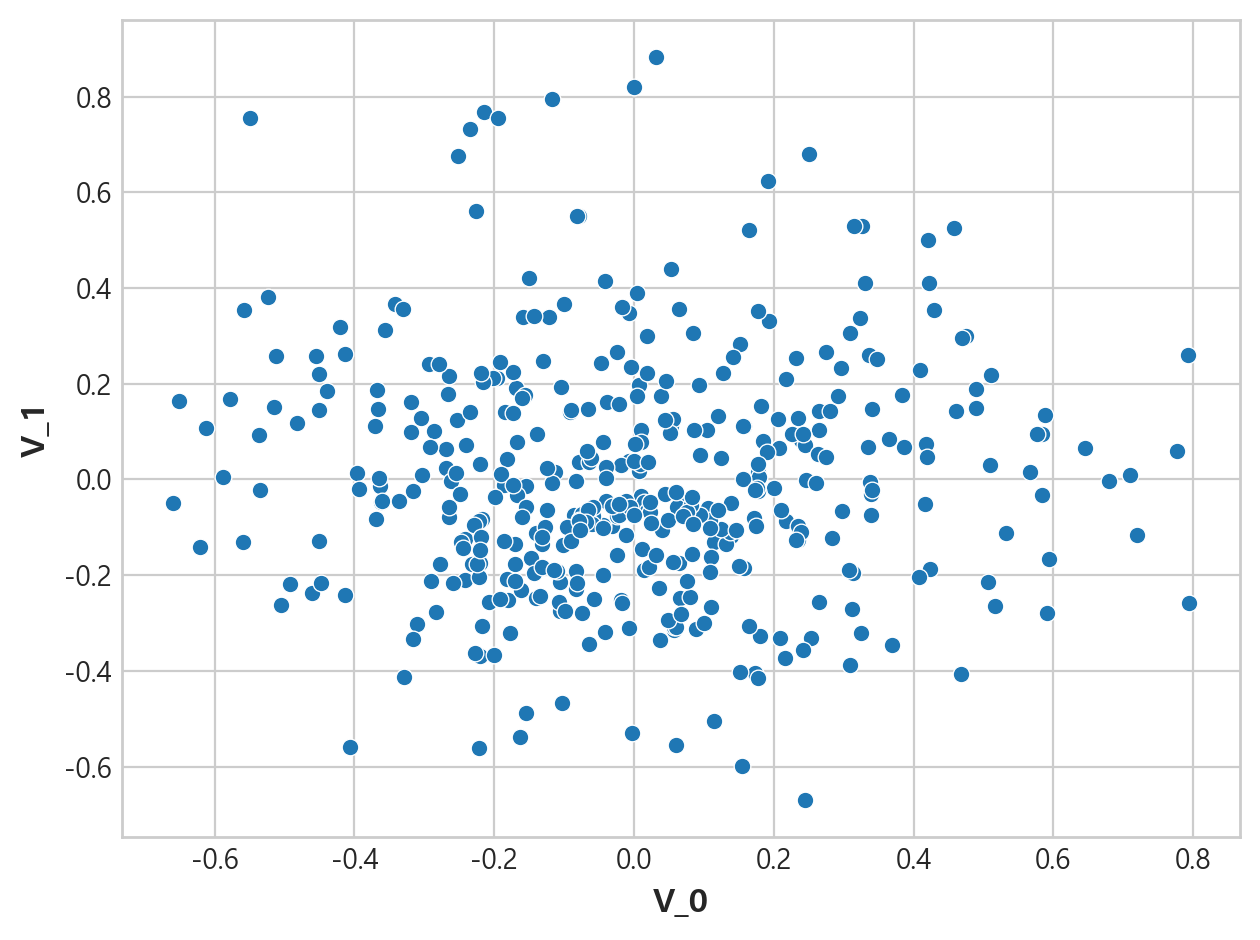

In [9]:
import seaborn as sns
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1')

In [10]:
pca_result_T.sort_values('V_0').head(10)

,V_행정동명,V_0,V_1,V_2
394,필동,-0.660355,-0.048411,0.392070
312,을지로동,-0.651767,0.163756,0.220484
91,둔촌1동,-0.621720,-0.141444,0.188045
3,가리봉동,-0.612605,0.107408,-0.156476
345,장충동,-0.588089,0.006152,0.046064
355,종로5.6가동,-0.578160,0.168944,0.107180
376,창신1동,-0.560045,-0.131278,-0.074370
30,광희동,-0.557756,0.354156,0.122425
354,종로1.2.3.4가동,-0.549133,0.754336,1.115468
239,신당동,-0.536105,0.093052,-0.034269


In [11]:
pca_result_T.sort_values('V_0').tail(10)

,V_행정동명,V_0,V_1,V_2
27,공릉2동,0.587460,0.135497,0.110950
332,잠실2동,0.591298,-0.279213,0.125718
46,길음1동,0.594345,-0.167067,0.168555
141,방화1동,0.645798,0.065415,0.031344
302,우장산동,0.679094,-0.004029,0.031780
259,신정3동,0.710345,0.008414,0.075882
310,위례동,0.719739,-0.116289,0.153284
370,진관동,0.776705,0.060339,0.292117
275,양재1동,0.793389,0.260735,0.365653
116,목5동,0.794465,-0.258356,0.223936


In [12]:
pca_result_T.sort_values('V_1').head(10)

,V_행정동명,V_0,V_1,V_2
72,대치1동,0.244730,-0.669822,0.401472
126,반포2동,0.154866,-0.598937,0.253340
111,명일2동,-0.221879,-0.561661,0.410790
15,개포1동,-0.406954,-0.559747,0.268320
21,고덕1동,0.060718,-0.554496,0.201624
336,잠실7동,-0.163287,-0.537135,0.061103
327,일원본동,-0.002148,-0.529100,0.347970
292,오륜동,0.115086,-0.505157,0.225405
117,무악동,-0.155221,-0.487748,0.067484
272,암사3동,-0.103116,-0.466800,0.073392


In [13]:
pca_result_T.sort_values('V_1').tail(10)

,V_행정동명,V_0,V_1,V_2
386,청룡동,0.191352,0.623837,-0.121172
417,화양동,-0.251832,0.675537,0.019692
5,가양1동,0.250883,0.679489,0.192243
243,신림동,-0.234859,0.731466,-0.128165
354,종로1.2.3.4가동,-0.549133,0.754336,1.115468
280,역삼1동,-0.194931,0.755175,0.482299
263,신촌동,-0.214869,0.766856,0.429921
4,가산동,-0.117360,0.795470,0.181084
287,영등포동,-0.000651,0.819616,0.225447
189,서교동,0.031945,0.882373,0.650519


In [14]:
pca_result_T

,V_행정동명,V_0,V_1,V_2
0,가락1동,0.313751,-0.194982,-0.059432
1,가락2동,0.416137,-0.051024,0.035967
2,가락본동,0.156997,0.112429,0.042758
3,가리봉동,-0.612605,0.107408,-0.156476
4,가산동,-0.117360,0.795470,0.181084
...,...,...,...,...
421,효창동,-0.220963,-0.147393,-0.076008
422,후암동,-0.173475,-0.012163,-0.079110
423,휘경1동,-0.266365,0.178560,-0.087341
424,휘경2동,0.044370,0.123468,-0.078969


In [15]:
pd.DataFrame(data=pca.components_, columns=scaled_df.columns).T

,0,1,2
0,-0.080590,0.094684,0.296722
1,0.271876,0.090130,0.215702
2,0.001329,0.056105,0.146875
3,-0.110020,-0.060351,0.260936
4,0.009614,0.053731,-0.037048
5,-0.008139,0.057883,0.131611
6,0.082841,0.304039,0.417959
7,0.026723,0.285493,0.453133
8,-0.094357,-0.190817,0.346881
9,0.808800,0.349410,-0.205978


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

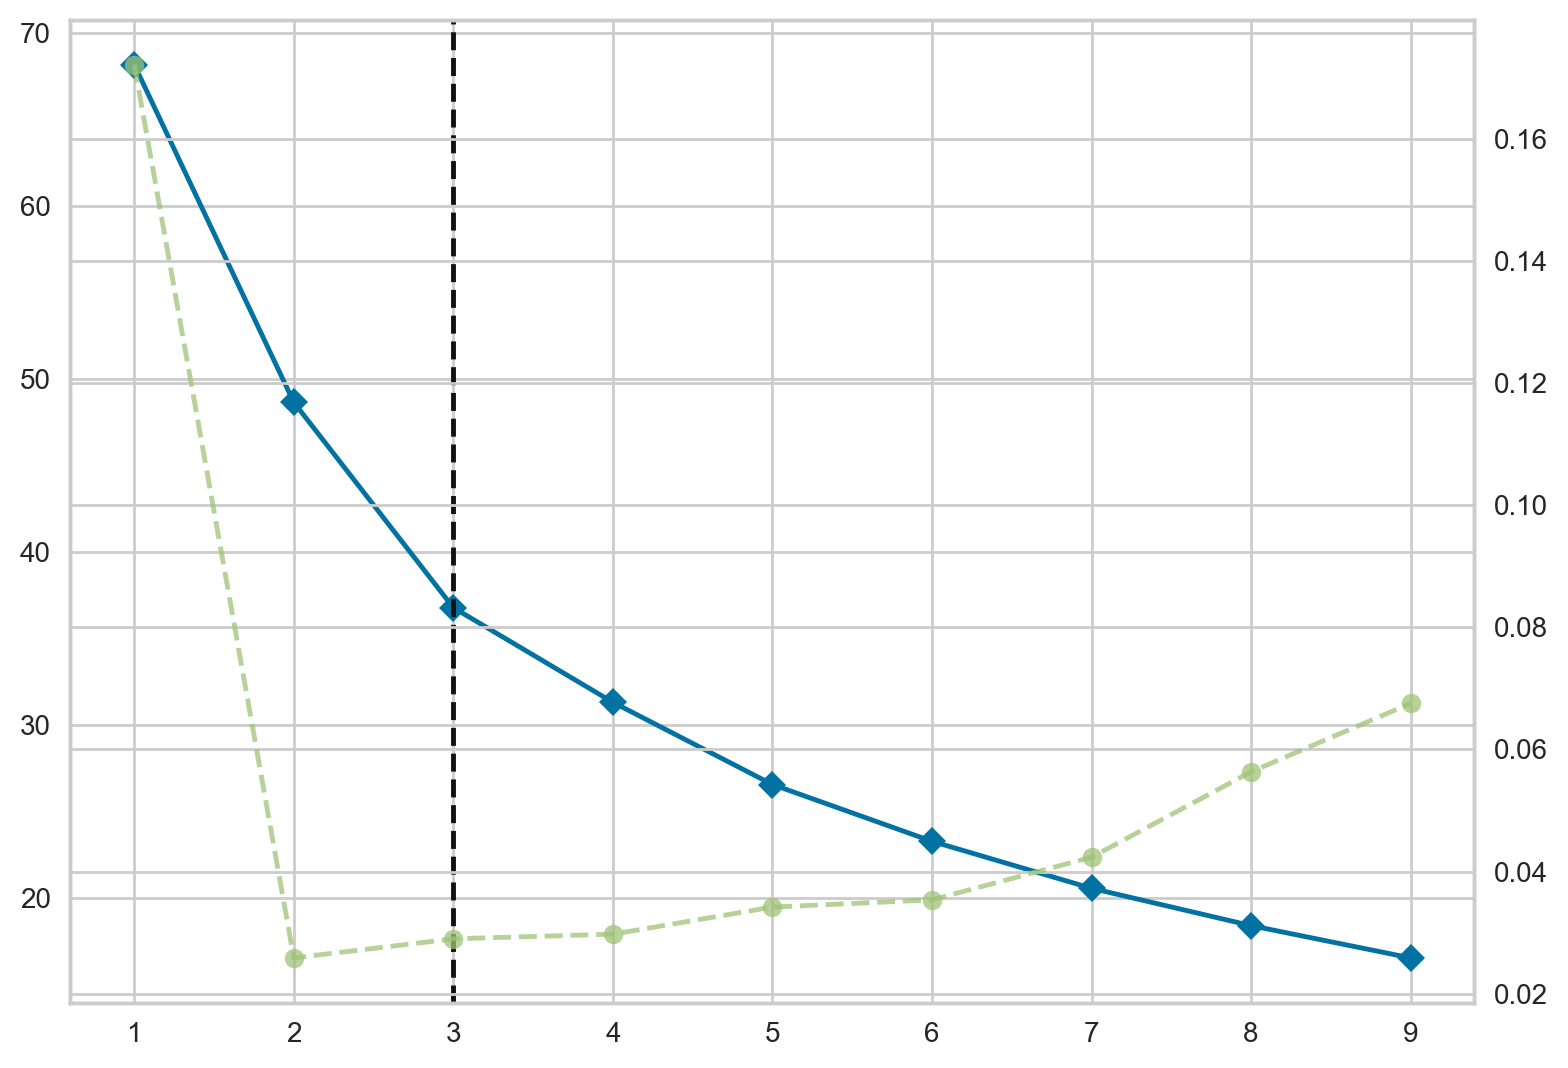

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


#엘보우 최적 클러스터 수 정하기
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10), n_init=10)
visualizer.fit(pca_result)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

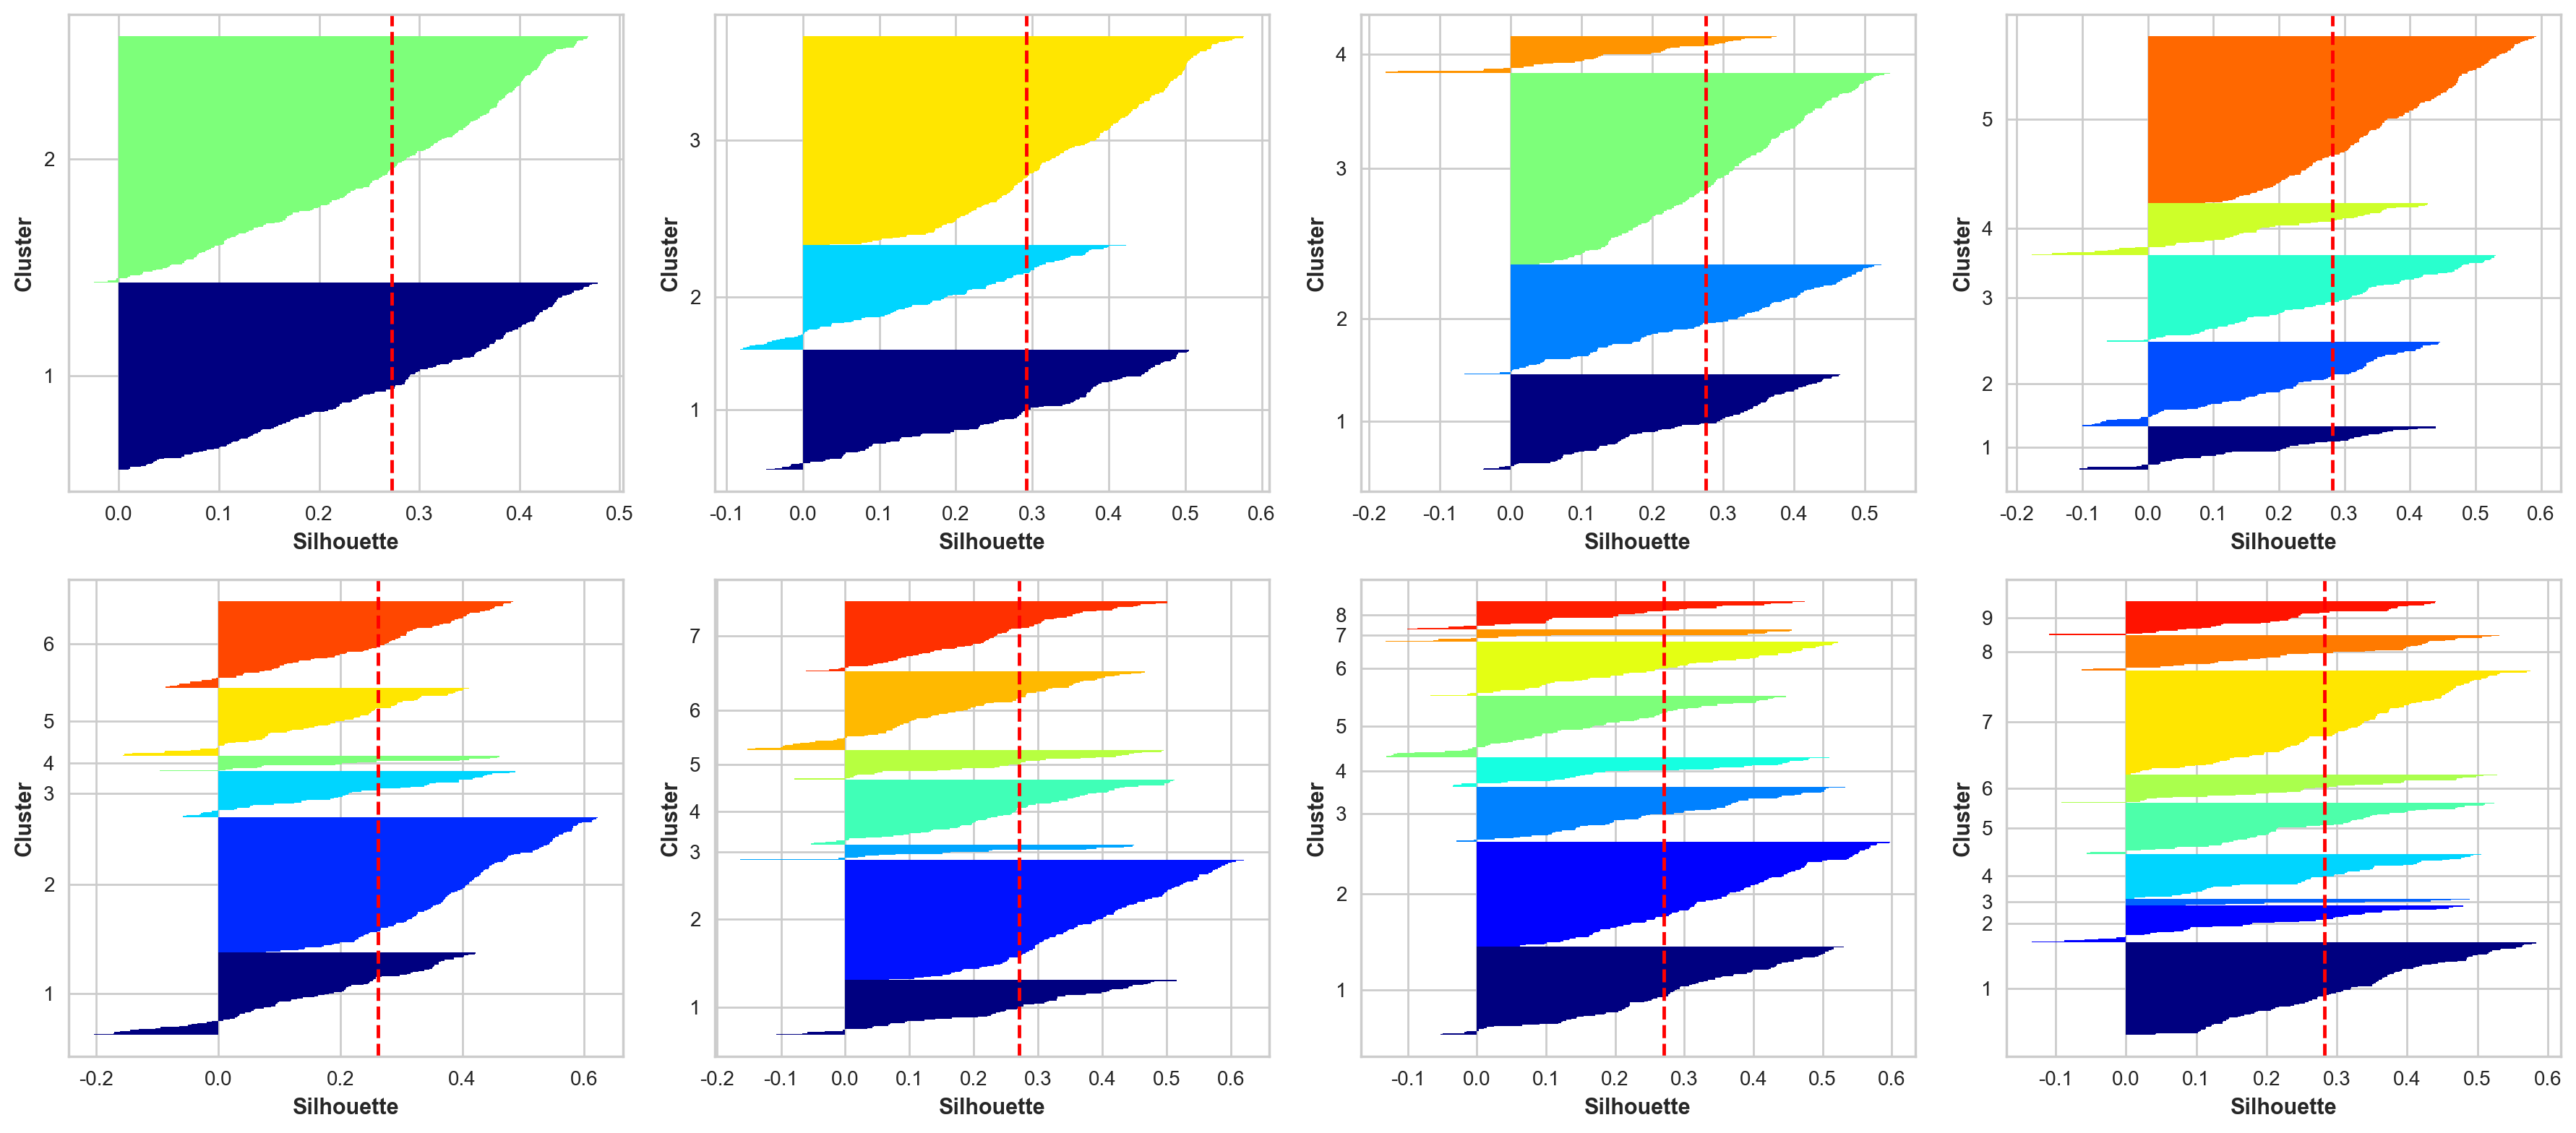

In [19]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(18,8))
for i, n_cluster in enumerate(n_clusters):
    kmeans= KMeans(n_clusters=n_cluster,
                   n_init=10,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_result)

    
    plt.subplot(nrows, ncols, i+1)
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_result, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    
plt.show()

In [20]:
pca_result.head(2)

,0,1,2
행정동명,,,
가락1동,0.313751,-0.194982,-0.059432
가락2동,0.416137,-0.051024,0.035967


c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


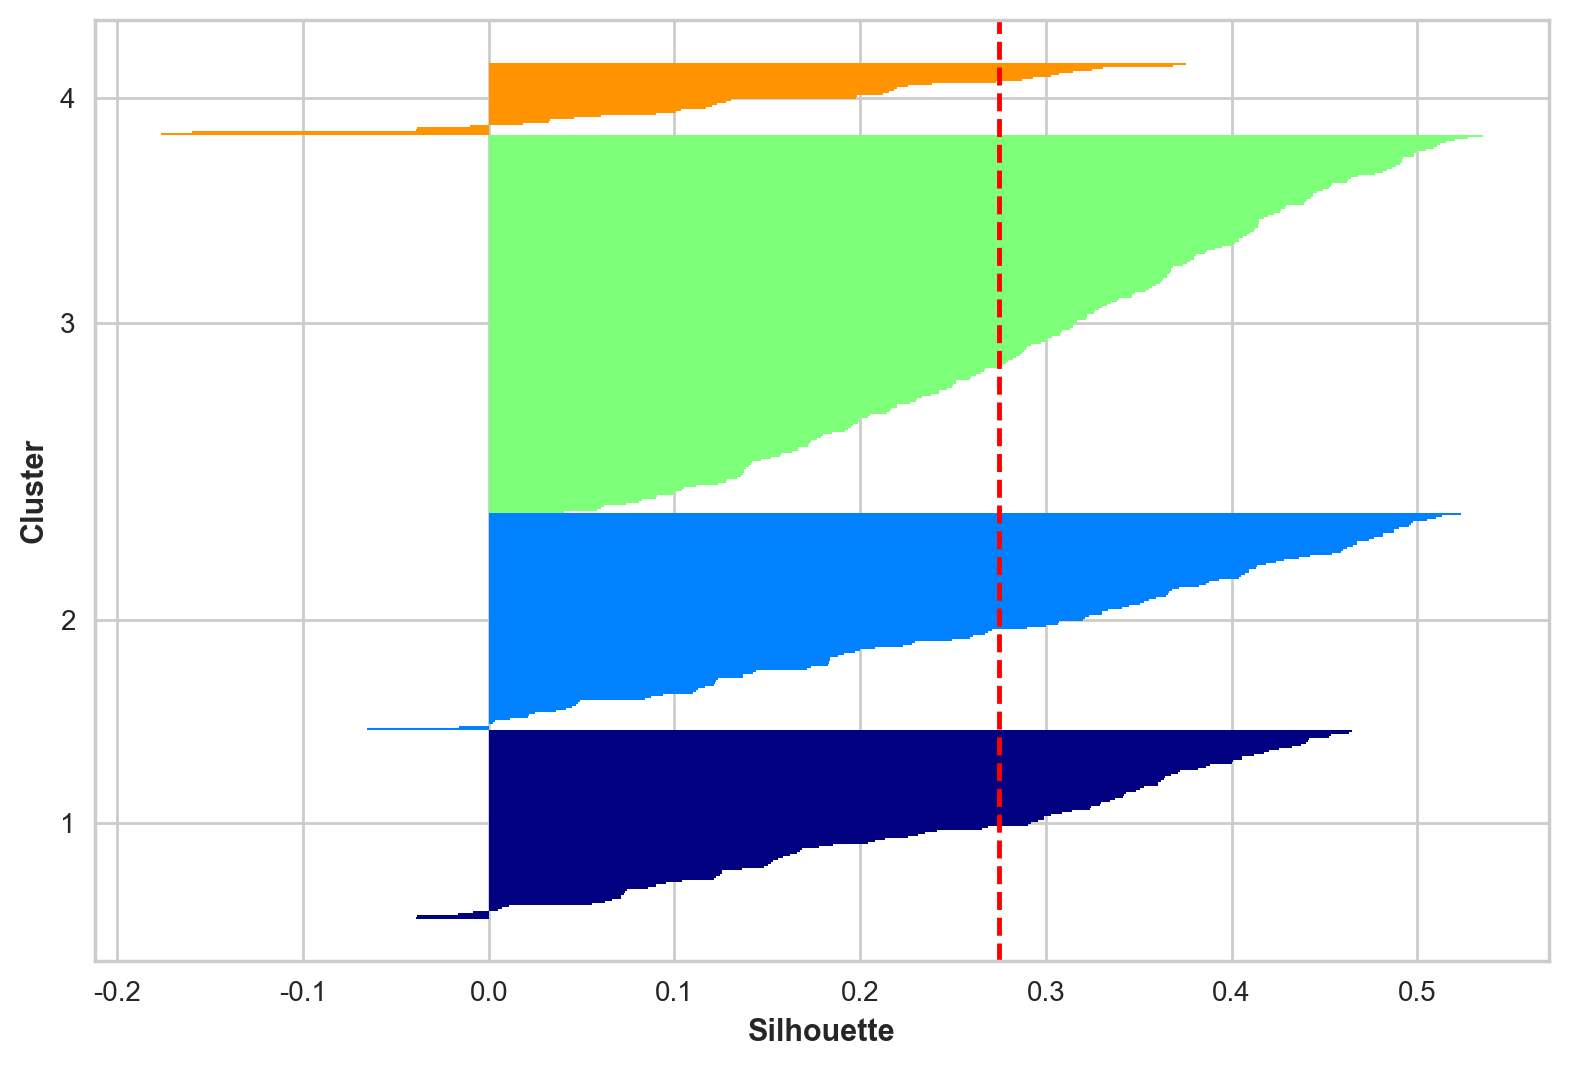

In [21]:
kmeans = KMeans(n_clusters=4,       # 클러스터 개수 4개
                init='k-means++',   # K-means 알고리즘 설정
                max_iter=300,       # 최대 몇번 반복 
                random_state=0)

y_km = kmeans.fit_predict(pca_result)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#실루엣 분석
silhouette_vals = silhouette_samples(pca_result, y_km, metric = 'euclidean')

#시각화
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
             edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#라벨링
pca_result['cluster'] = kmeans.labels_
#실루엣계수 평균값
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette')

plt.tight_layout()
plt.show()

In [22]:
pca_result.head(3)

,0,1,2,cluster
행정동명,,,,
가락1동,0.313751,-0.194982,-0.059432,1
가락2동,0.416137,-0.051024,0.035967,1
가락본동,0.156997,0.112429,0.042758,1


In [23]:
for i in range(4):
    print(f"cluster_{i}의 개수: {len(pca_result[pca_result['cluster'] == i].index)}개")

cluster_0의 개수: 94개
cluster_1의 개수: 108개
cluster_2의 개수: 188개
cluster_3의 개수: 36개


<Axes: xlabel='V_0', ylabel='V_1'>

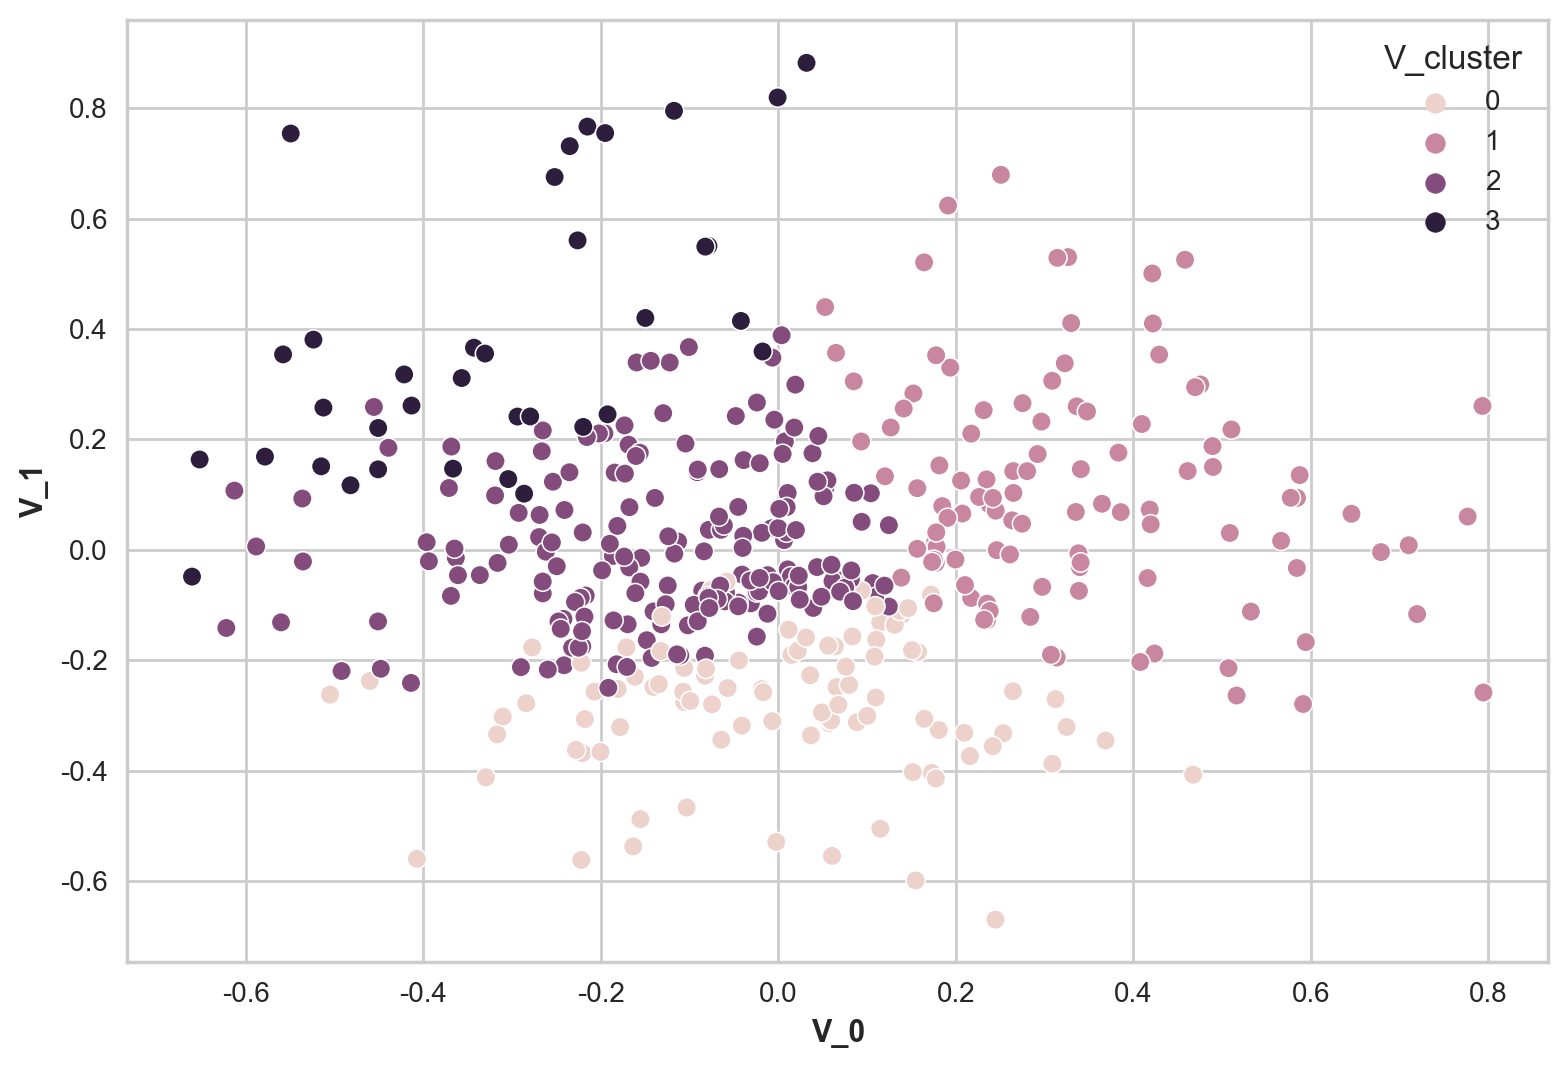

In [24]:
pca_result_T = pca_result.reset_index().copy()

pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]

sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_2'>

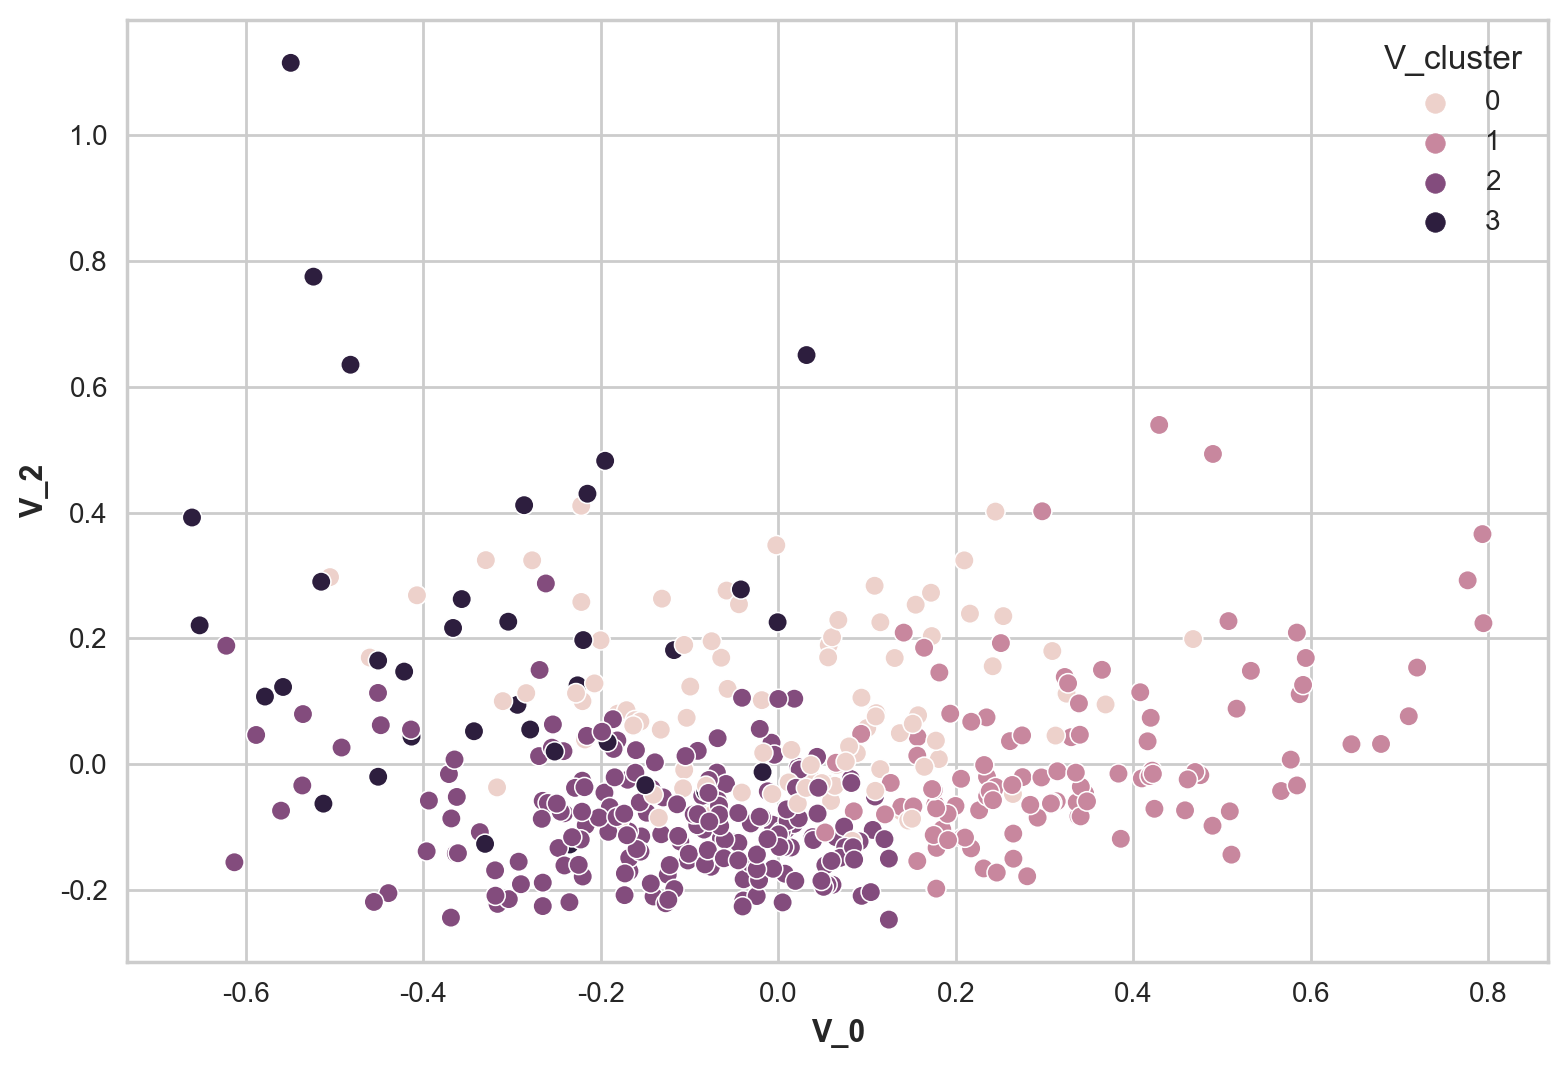

In [25]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_2', hue = 'V_cluster')

<Axes: xlabel='V_1', ylabel='V_2'>

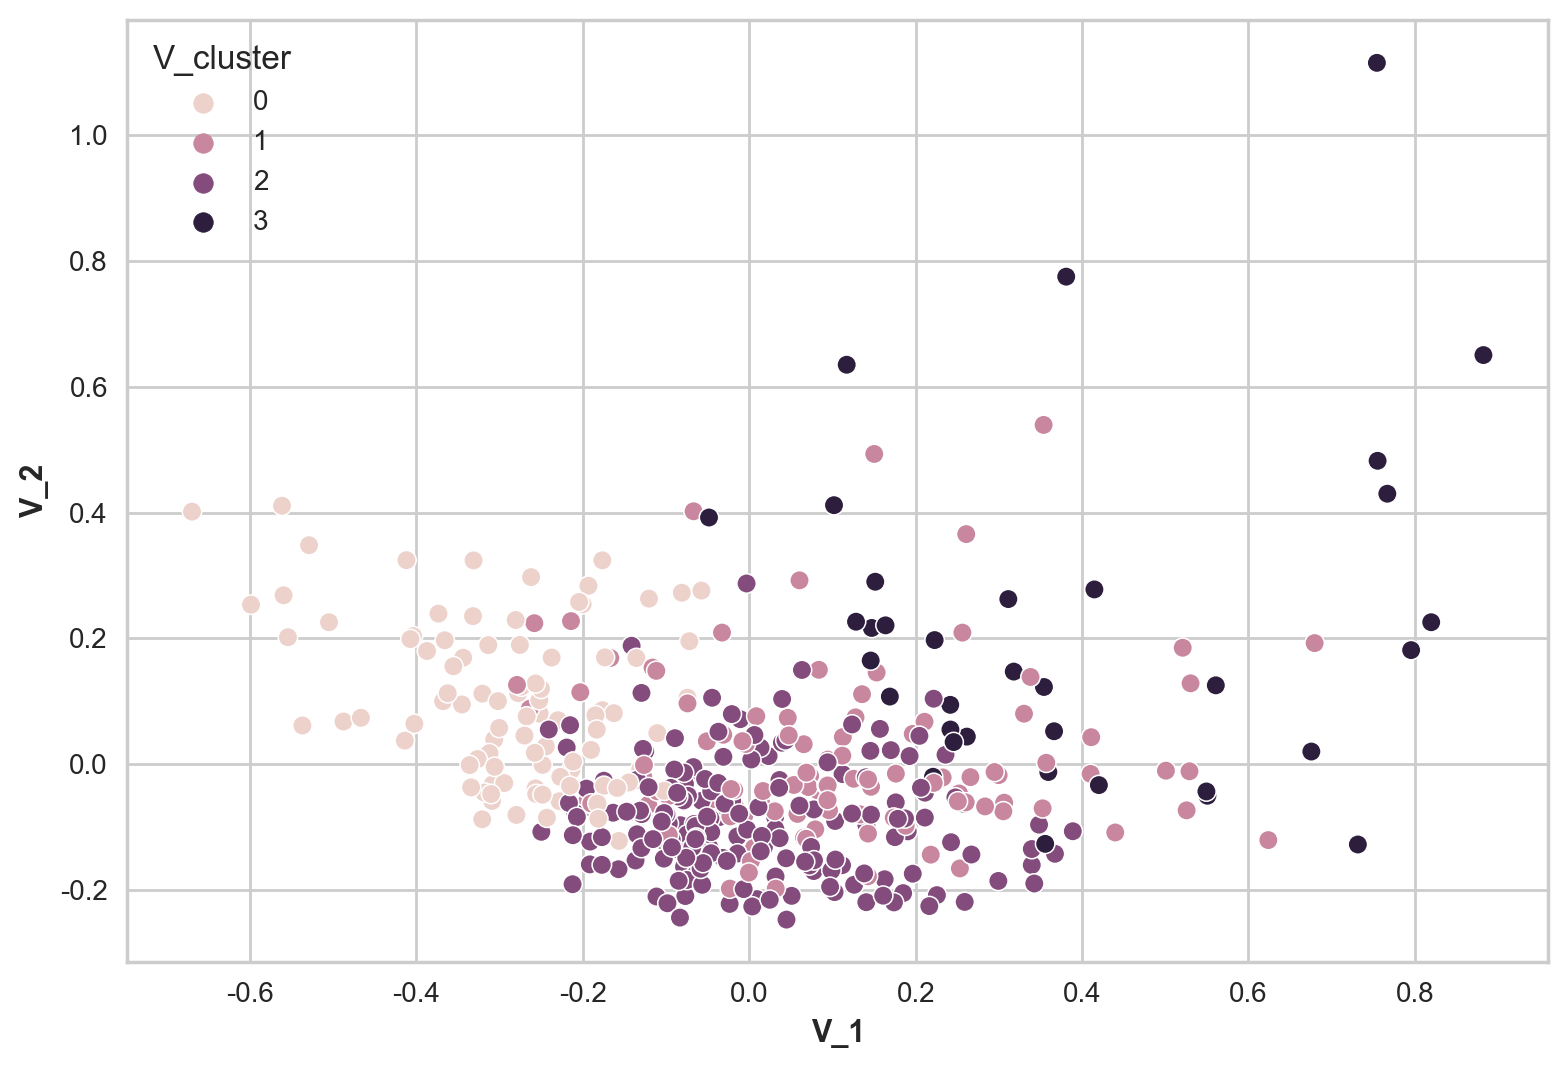

In [26]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_1', y = 'V_2', hue = 'V_cluster')

In [27]:
# 피처별 순위 계산 (1~426등)
def rank(data):
    for col in data.columns:
        data[col] = data[col].rank(ascending=False).astype('int')
    return data

In [28]:
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
cluster_0

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
가회동,47.392,1,0.0,591.743815,2.0,1.0,139554.0,73.0,0.000217,9200,0.067391,0.203913,0.257391,0.483368
강일동,32.123,8,2.0,25.810345,3.0,0.0,262007.0,20.0,0.000213,32811,0.110146,0.230715,0.261010,0.274074
개봉2동,17.357,1,0.0,19.521449,0.0,0.0,312685.0,33.0,0.000099,30159,0.069167,0.245565,0.309791,0.285024
개봉3동,17.357,5,0.0,67.893088,3.0,0.0,123892.0,29.0,0.000202,19842,0.066274,0.241105,0.312620,0.330356
개포1동,16.560,0,0.0,763.498160,4.0,0.0,103771.0,1.0,0.000217,9200,0.076630,0.148043,0.245326,0.262796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
청운효자동,118.479,2,0.0,209.289298,2.0,1.0,234604.0,70.0,0.000174,23022,0.097211,0.257840,0.256624,0.387715
평창동,24.822,5,0.0,59.494262,0.0,0.0,220912.0,57.0,0.000029,34952,0.087263,0.239357,0.289883,0.319268
하계2동,15.673,3,0.0,84.547088,0.0,0.0,184885.0,7.0,0.000094,42734,0.118781,0.237516,0.243085,0.239014


In [53]:
# 클러스터 0 순위
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_cluster_0 = cluster_0.copy()
ranked_cluster_0 = ranked_cluster_0.rank(ascending=False)
ranked_cluster_0['sum'] = ranked_cluster_0.sum(axis=1).astype('int')
ranked_cluster_0['ranking'] = ranked_cluster_0['sum'].rank(ascending=True)
ranked_cluster_0.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
오류2동,9.0,6.0,55.5,77.0,3.5,13.0,30.0,28.5,2.0,29.0,34.0,54.0,16.0,32.0,389,1.0
청운효자동,1.0,66.0,55.5,17.0,35.0,13.0,36.0,11.0,20.0,72.0,48.0,30.0,37.0,8.0,449,2.0
방배4동,36.0,66.0,55.5,28.0,7.5,13.0,19.0,13.0,77.0,12.0,26.0,26.0,65.0,15.0,459,3.0
강일동,12.0,11.5,5.5,69.0,18.0,58.5,24.0,61.0,9.0,48.0,29.0,61.0,34.0,52.0,492,4.0
역삼2동,79.0,6.0,55.5,71.0,3.5,13.0,8.0,6.0,85.0,34.0,7.0,42.0,92.0,4.0,506,5.0


In [54]:
# 클러스터 1 순위
cluster_1 = data.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_cluster_1 = cluster_1.copy()
ranked_cluster_1 = ranked_cluster_1.rank(ascending=False)
ranked_cluster_1['sum'] = ranked_cluster_1.sum(axis=1).astype('int')
ranked_cluster_1['ranking'] = ranked_cluster_1['sum'].rank(ascending=True)
ranked_cluster_1.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
진관동,25.0,5.0,63.5,70.0,51.0,16.5,10.0,11.5,2.5,7.0,1.0,27.0,9.0,89.0,388,1.0
성산2동,24.0,15.5,16.0,54.0,5.0,16.5,52.0,56.5,46.0,14.0,55.0,19.0,70.0,25.0,468,2.0
화곡1동,62.0,10.5,63.5,19.0,74.0,7.0,16.0,27.5,72.5,7.0,99.0,2.0,7.0,12.0,479,3.0
공릉1동,47.0,34.0,63.5,21.0,18.5,16.5,74.0,25.5,16.0,25.0,71.0,25.0,32.0,19.0,488,4.0
상암동,55.5,4.0,3.5,11.0,93.5,4.5,7.0,5.0,14.0,60.0,13.0,80.0,92.0,62.0,505,5.0


In [55]:
# 클러스터 2 순위
cluster_2 = data.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_cluster_2 = cluster_2.copy()
ranked_cluster_2 = ranked_cluster_2.rank(ascending=False)
ranked_cluster_2['sum'] = ranked_cluster_2.sum(axis=1).astype('int')
ranked_cluster_2['ranking'] = ranked_cluster_2['sum'].rank(ascending=True)
ranked_cluster_2.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
길동,45.5,33.5,100.5,21.0,5.0,114.0,36.0,16.0,11.0,38.0,102.0,84.0,92.0,105.0,803,1.0
화곡6동,102.5,33.5,1.0,80.0,62.0,11.0,20.0,83.0,101.0,8.0,101.0,32.0,135.0,53.0,823,2.0
삼선동,1.0,56.5,10.5,144.0,29.0,114.0,2.0,26.5,146.0,39.0,17.0,59.0,142.0,61.0,847,3.0
당산1동,12.5,153.5,5.5,37.0,17.5,11.0,42.0,17.0,141.0,52.0,165.0,19.0,159.0,38.0,870,4.0
구로2동,73.0,83.5,5.5,54.0,17.5,11.0,3.0,66.0,79.0,159.0,130.0,161.0,22.0,63.0,927,5.0


In [56]:
# 클러스터 3 순위
cluster_3 = data.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_cluster_3 = cluster_3.copy()
ranked_cluster_3 = ranked_cluster_3.rank(ascending=False)
ranked_cluster_3['sum'] = ranked_cluster_3.sum(axis=1).astype('int')
ranked_cluster_3['ranking'] = ranked_cluster_3['sum'].rank(ascending=True)
ranked_cluster_3.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
종로1.2.3.4가동,1.0,6.0,1.0,25.0,2.5,4.5,1.0,2.0,3.0,29.0,30.0,30.0,2.0,3.0,140,1.0
신촌동,17.0,13.5,21.0,22.0,11.0,11.0,4.0,6.0,9.0,10.0,15.0,3.0,33.0,4.0,179,2.0
사직동,4.5,6.0,21.0,8.0,22.0,11.0,12.0,9.0,13.0,26.0,2.0,31.0,7.0,36.0,208,3.0
역삼1동,32.0,6.0,21.0,19.0,6.0,11.0,3.0,3.0,25.0,14.0,24.0,11.0,31.0,11.0,217,4.0
명동,2.0,1.0,21.0,10.0,15.5,1.0,11.0,5.0,15.0,34.0,31.0,36.0,19.0,18.0,219,5.0


In [58]:
print(ranked_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

['오류2동', '청운효자동', '방배4동', '강일동', '역삼2동']
['진관동', '성산2동', '화곡1동', '공릉1동', '상암동']
['길동', '화곡6동', '삼선동', '당산1동', '구로2동']
['종로1.2.3.4가동', '신촌동', '사직동', '역삼1동', '명동']


In [74]:
areas = ranked_cluster_0.sort_values('ranking').head(5).index.to_list()
areas.extend(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

In [75]:
result_df = data.copy()
result_df = result_df.loc[areas]
result_df

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
오류2동,34.714,9,0.0,13.821674,5.0,1.0,247964.0,42.0,0.000318,37708,0.105415,0.236395,0.291185,0.322479
청운효자동,118.479,2,0.0,209.289298,2.0,1.0,234604.0,70.0,0.000174,23022,0.097211,0.257840,0.256624,0.387715
방배4동,17.205,2,0.0,125.601944,4.0,1.0,302736.0,59.0,0.000066,45738,0.115440,0.260921,0.221391,0.356643
강일동,32.123,8,2.0,25.810345,3.0,0.0,262007.0,20.0,0.000213,32811,0.110146,0.230715,0.261010,0.274074
역삼2동,13.996,9,0.0,24.183588,5.0,1.0,444161.0,97.0,0.000054,36920,0.157449,0.246479,0.144664,0.417509
진관동,18.541,16,0.0,27.848659,3.0,2.0,703798.0,114.0,0.000173,80894,0.177096,0.318145,0.314411,0.306428
성산2동,27.689,11,1.0,35.942243,11.0,2.0,370508.0,55.0,0.000090,77894,0.078799,0.342671,0.229029,0.489176
화곡1동,14.838,13,0.0,84.231195,2.0,3.0,614122.0,80.0,0.000062,80894,0.055134,0.492941,0.317082,0.542225
공릉1동,15.673,8,0.0,80.254290,7.0,2.0,296420.0,81.0,0.000124,72480,0.069233,0.320088,0.278146,0.511409


In [60]:
result_df.to_csv('./data/result_1023.csv')

클러스터별 통계량 비교하기

In [61]:
cluster_0.describe()

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,20.828245,3.882979,0.276596,117.104966,1.680851,0.265957,231700.563830,35.425532,0.000126,31741.404255,0.103281,0.238607,0.242859,0.282623
std,16.887933,2.950693,0.662421,159.195863,1.438434,0.511702,143599.777079,29.251041,0.000063,10954.670778,0.032857,0.042287,0.048252,0.081024
min,11.848000,0.000000,0.000000,1.287593,0.000000,0.000000,22966.000000,1.000000,0.000000,9200.000000,0.008478,0.010435,0.013043,0.078523
25%,14.719000,2.000000,0.000000,24.559404,1.000000,0.000000,140197.250000,15.000000,0.000076,23492.250000,0.082849,0.219409,0.216554,0.232939
50%,15.723500,3.000000,0.000000,63.233935,1.000000,0.000000,204214.000000,27.000000,0.000121,32946.500000,0.097290,0.241113,0.244818,0.286711
75%,17.349500,5.000000,0.000000,148.205288,3.000000,0.000000,261351.000000,45.000000,0.000167,39600.500000,0.116046,0.266642,0.275454,0.332516
max,118.479000,14.000000,3.000000,996.190369,6.000000,2.000000,680504.000000,152.000000,0.000349,52766.000000,0.223722,0.322368,0.324139,0.531746


In [62]:
cluster_1.describe().astype('int64')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,108,108,108,108,108,108,108,108,108,108,108,108,108,108
mean,22,6,0,51,3,0,416651,67,0,63614,0,0,0,0
std,16,4,0,50,3,1,223651,44,0,9907,0,0,0,0
min,11,0,0,0,0,0,154767,14,0,42754,0,0,0,0
25%,14,4,0,19,2,0,260224,41,0,55978,0,0,0,0
50%,15,6,0,35,3,0,359526,56,0,61738,0,0,0,0
75%,17,9,0,64,5,1,493545,80,0,71607,0,0,0,0
max,100,26,4,349,18,8,1631757,302,0,80894,0,0,0,0


In [63]:
cluster_2.describe().astype('int64')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,188,188,188,188,188,188,188,188,188,188,188,188,188,188
mean,21,3,0,65,3,0,222724,36,0,34432,0,0,0,0
std,17,2,0,93,6,0,117914,22,0,10643,0,0,0,0
min,11,0,0,1,0,0,52391,0,0,9200,0,0,0,0
25%,14,1,0,16,1,0,141240,20,0,27128,0,0,0,0
50%,15,3,0,32,2,0,205293,32,0,35747,0,0,0,0
75%,17,4,0,77,5,0,271623,44,0,42780,0,0,0,0
max,113,11,4,677,86,5,746864,124,0,56090,0,0,0,0


In [64]:
cluster_3.describe().astype('int64')

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
count,36,36,36,36,36,36,36,36,36,36,36,36,36,36
mean,71,3,0,116,3,2,657932,130,0,28931,0,0,0,0
std,75,2,2,74,2,5,414123,84,0,14791,0,0,0,0
min,12,0,0,5,0,0,127848,32,0,9200,0,0,0,0
25%,14,2,0,61,1,0,401864,74,0,13990,0,0,0,0
50%,47,3,0,107,2,1,500734,114,0,29452,0,0,0,0
75%,114,5,0,165,5,2,876053,144,0,41108,0,0,0,0
max,343,8,11,325,10,31,1910857,406,0,60792,0,0,0,0


min_max 스케일링된 데이터로 랭킹 구하기

In [67]:
scaled_cluster_0 = scaled_df.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_scaled_cluster_0 = scaled_cluster_0.copy()
ranked_scaled_cluster_0.columns = data.columns
ranked_scaled_cluster_0['sum'] = ranked_scaled_cluster_0.sum(axis=1)
ranked_scaled_cluster_0['ranking'] = ranked_scaled_cluster_0['sum'].rank(ascending=False)
ranked_scaled_cluster_0.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
오류2동,0.068927,0.346154,0.000000,0.012897,0.058140,0.032258,0.119180,0.103448,0.731940,0.397634,0.469901,0.353816,0.632122,0.313057,3.639475,1.0
개포3동,0.114037,0.153846,0.000000,1.000000,0.000000,0.000000,0.024656,0.036946,0.404242,0.109758,0.433850,0.358588,0.615843,0.341025,3.592791,2.0
명일2동,0.016516,0.076923,0.000000,0.477318,0.023256,0.000000,0.048038,0.100985,0.801859,0.111725,0.616430,0.351066,0.527522,0.245873,3.397511,3.0
청운효자동,0.321427,0.076923,0.000000,0.209307,0.023256,0.032258,0.112103,0.172414,0.399618,0.192792,0.433142,0.386181,0.556645,0.396771,3.312836,4.0
강일동,0.061117,0.307692,0.181818,0.024944,0.034884,0.000000,0.126618,0.049261,0.490689,0.329330,0.491098,0.345244,0.566223,0.250941,3.259860,5.0


In [68]:
scaled_cluster_1 = scaled_df.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_scaled_cluster_1 = scaled_cluster_1.copy()
ranked_scaled_cluster_1.columns = data.columns
ranked_scaled_cluster_1['sum'] = ranked_scaled_cluster_1.sum(axis=1)
ranked_scaled_cluster_1['ranking'] = ranked_scaled_cluster_1['sum'].rank(ascending=False)
ranked_scaled_cluster_1.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
진관동,0.020175,0.615385,0.000000,0.026992,0.034884,0.064516,0.360631,0.280788,0.398052,1.000000,0.791082,0.477193,0.682847,0.292459,5.045004,1.0
양재1동,0.058292,1.000000,0.000000,0.036686,0.023256,0.000000,0.488580,0.280788,0.341187,1.000000,0.489318,0.403276,0.566165,0.352300,5.039847,2.0
상암동,0.010526,0.692308,0.272727,0.121237,0.011628,0.129032,0.431241,0.371921,0.307066,0.707479,0.569451,0.389548,0.444850,0.377943,4.836957,3.0
여의동,0.014846,0.153846,0.000000,0.080705,0.046512,0.064516,0.852163,0.743842,0.246970,0.780958,0.405565,0.370934,0.585880,0.307461,4.654198,4.0
가양1동,0.056767,0.461538,0.000000,0.076893,0.023256,0.225806,0.228031,0.536946,0.134980,0.822356,0.226998,0.740069,0.349175,0.768318,4.651134,5.0


In [69]:
scaled_cluster_2 = scaled_df.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_scaled_cluster_2 = scaled_cluster_2.copy()
ranked_scaled_cluster_2.columns = data.columns
ranked_scaled_cluster_2['sum'] = ranked_scaled_cluster_2.sum(axis=1)
ranked_scaled_cluster_2['ranking'] = ranked_scaled_cluster_2['sum'].rank(ascending=False)
ranked_scaled_cluster_2.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
제기동,0.006927,0.076923,0.000000,0.009733,1.000000,0.000000,0.287772,0.130542,0.239753,0.540715,0.235025,0.474986,0.716036,0.650481,4.368892,1.0
삼선동,0.305430,0.153846,0.090909,0.013531,0.069767,0.000000,0.355288,0.145320,0.102683,0.496527,0.348237,0.488774,0.546005,0.569561,3.685879,2.0
화곡6동,0.009013,0.192308,0.363636,0.039421,0.046512,0.064516,0.179187,0.086207,0.184947,0.565515,0.262567,0.534116,0.552715,0.585291,3.665951,3.0
길동,0.016516,0.192308,0.000000,0.150700,0.174419,0.000000,0.140682,0.169951,0.410641,0.496666,0.262560,0.456936,0.617578,0.495179,3.584135,4.0
방이2동,0.016516,0.230769,0.000000,0.149040,0.139535,0.000000,0.108961,0.201970,0.044342,0.595168,0.185190,0.659096,0.455803,0.708026,3.494417,5.0


In [70]:
scaled_cluster_3 = scaled_df.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_scaled_cluster_3 = scaled_cluster_3.copy()
ranked_scaled_cluster_3.columns = data.columns
ranked_scaled_cluster_3['sum'] = ranked_scaled_cluster_3.sum(axis=1)
ranked_scaled_cluster_3['ranking'] = ranked_scaled_cluster_3['sum'].rank(ascending=False)
ranked_scaled_cluster_3.sort_values('ranking').head(5)

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대,sum,ranking
행정동명,,,,,,,,,,,,,,,,
종로1.2.3.4가동,1.000000,0.230769,1.0,0.071054,0.093023,0.161290,1.000000,0.798030,0.514925,0.058582,0.133993,0.428410,0.797076,0.927132,7.214284,1.0
명동,0.785713,0.307692,0.0,0.163768,0.034884,1.000000,0.428661,0.564039,0.250000,0.000000,0.127116,0.226053,0.455297,0.794360,5.137583,2.0
서교동,0.098311,0.269231,0.0,0.078437,0.023256,0.000000,0.886659,1.000000,0.142227,0.548358,0.193367,0.708502,0.408458,0.766423,5.123229,3.0
신촌동,0.154894,0.153846,0.0,0.092077,0.058140,0.064516,0.609668,0.549261,0.339116,0.439284,0.204347,0.900553,0.311546,0.925271,4.802519,4.0
영등포동,0.419335,0.153846,0.0,0.058186,0.058140,0.000000,0.587774,0.322660,0.151336,0.719614,0.121980,0.812274,0.362557,0.886833,4.654535,5.0


In [71]:
print(ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

['오류2동', '개포3동', '명일2동', '청운효자동', '강일동']
['진관동', '양재1동', '상암동', '여의동', '가양1동']
['제기동', '삼선동', '화곡6동', '길동', '방이2동']
['종로1.2.3.4가동', '명동', '서교동', '신촌동', '영등포동']


In [72]:
scaled_areas = ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list()
scaled_areas.extend(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

In [73]:
scaled_result_df = data.copy()
scaled_result_df = scaled_result_df.loc[scaled_areas]
scaled_result_df

,미세먼지지수,공원수,도시농업(프로그램수),거주_유동_인구당_매출액,채소가게수,제로웨이스트 가게수,승하차인원_버스_지하철,카페수,유치원_초등학교,인구수,총_10대,총_20_30대,총_60대이상,1인세대
행정동명,,,,,,,,,,,,,,
오류2동,34.714,9,0.0,13.821674,5.0,1.0,247964.0,42.0,0.000318,37708,0.105415,0.236395,0.291185,0.322479
개포3동,49.679,4,0.0,996.190369,0.0,0.0,69514.0,15.0,0.000176,17069,0.097370,0.239557,0.283731,0.344273
명일2동,17.327,2,0.0,476.014744,2.0,0.0,113657.0,41.0,0.000349,17210,0.138117,0.234573,0.243289,0.270125
청운효자동,118.479,2,0.0,209.289298,2.0,1.0,234604.0,70.0,0.000174,23022,0.097211,0.257840,0.256624,0.387715
강일동,32.123,8,2.0,25.810345,3.0,0.0,262007.0,20.0,0.000213,32811,0.110146,0.230715,0.261010,0.274074
진관동,18.541,16,0.0,27.848659,3.0,2.0,703798.0,114.0,0.000173,80894,0.177096,0.318145,0.314411,0.306428
양재1동,31.186,26,0.0,37.496612,2.0,0.0,945351.0,114.0,0.000148,80894,0.109749,0.269167,0.260984,0.353060
상암동,15.340,18,3.0,121.641730,1.0,4.0,837102.0,151.0,0.000134,59922,0.127633,0.260071,0.205434,0.373043
여의동,16.773,4,0.0,81.303879,4.0,2.0,1631757.0,302.0,0.000107,65190,0.091057,0.247737,0.270011,0.318118
